# Xarray - Meteorolojik Veri

Bu kısımda Meteorolojik veri kullanımında Python üzerinde önemli bir yer tutan Xarray paketi'nin kullanımı hakkında bilgi edineceğiz.

İlk yapmamız gereken xarray, netCDF4 ve pyDAP kütüphanelerini indirebilmek.
- Eğer Anaconda kullanıyorsanız;
  - **conda install -c anaconda xarray**
  - **conda install -c anaconda netcdf4**
  - **conda install -c conda-forge pydap**
  
- Eğer pip kullanıyorsanız;
  - **pip install xarray**
  - **pip install netcdf4**
  - **pip install pydap**

Anaconda kullanımı önerilir.

## Veriyi Ortama Yükleme

In [6]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import time

Şimdi son gfs verisini alacağız ve işlem gerçekleştireceğiz **https://nomads.ncep.noaa.gov/** adresinden istediğimiz opendap olanaklı veriyi seçiyoruz. Daha sonra içerisinde istediğimiz veriye gidip xarray open_dataset fonksiyonu ile açıyoruz.

In [13]:
data = xr.open_dataset(r'http://nomads.ncep.noaa.gov:80/dods/gfs_0p25/gfs20201209/gfs_0p25_00z')

## Veriyi Tanıma

Verimizin değişkenlerinden birisini yeni değişken olarak atayıp içine bakalım.

Mesela 2m sıcaklık:

In [14]:
temperature = data['tmp2m']
temperature

<xarray.DataArray 'tmp2m' (time: 81, lat: 721, lon: 1440)>
[84097440 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-12-09 2020-12-09T03:00:00 ... 2020-12-19
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
Attributes:
    long_name:  ** 2 m above ground temperature [k]

Yukarıda dataset'in genel bir overviewini görmekteyiz. Peki yukarıda belirtilen her bir bölüme nasıl bakabiliriz?

Mesela verinin koordinatlarını nelermiş bakalım..

In [15]:
temperature.coords

Coordinates:
  * time     (time) datetime64[ns] 2020-12-09 2020-12-09T03:00:00 ... 2020-12-19
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8

Şimdi verinin dimensionlarına bakalım

In [16]:
temperature.dims

('time', 'lat', 'lon')

Şimdi veride gördüğümüz time koordinatların içeriğine bakalım

In [18]:
temperature['time']

<xarray.DataArray 'time' (time: 81)>
array(['2020-12-09T00:00:00.000000000', '2020-12-09T03:00:00.000000000',
       '2020-12-09T06:00:00.000000000', '2020-12-09T09:00:00.000000000',
       '2020-12-09T12:00:00.000000000', '2020-12-09T15:00:00.000000000',
       '2020-12-09T18:00:00.000000000', '2020-12-09T21:00:00.000000000',
       '2020-12-10T00:00:00.000000000', '2020-12-10T03:00:00.000000000',
       '2020-12-10T06:00:00.000000000', '2020-12-10T09:00:00.000000000',
       '2020-12-10T12:00:00.000000000', '2020-12-10T15:00:00.000000000',
       '2020-12-10T18:00:00.000000000', '2020-12-10T21:00:00.000000000',
       '2020-12-11T00:00:00.000000000', '2020-12-11T03:00:00.000000000',
       '2020-12-11T06:00:00.000000000', '2020-12-11T09:00:00.000000000',
       '2020-12-11T12:00:00.000000000', '2020-12-11T15:00:00.000000000',
       '2020-12-11T18:00:00.000000000', '2020-12-11T21:00:00.000000000',
       '2020-12-12T00:00:00.000000000', '2020-12-12T03:00:00.000000000',
       '2020-12-12T06:00:00.000000000', '2020-12-12T09:00:00.000000000',
       '2020-12-12T12:00:00.000000000', '2020-12-12T15:00:00.000000000',
       '2020-12-12T18:00:00.000000000', '2020-12-12T21:00:00.000000000',
       '2020-12-13T00:00:00.000000000', '2020-12-13T03:00:00.000000000',
       '2020-12-13T06:00:00.000000000', '2020-12-13T09:00:00.000000000',
       '2020-12-13T12:00:00.000000000', '2020-12-13T15:00:00.000000000',
       '2020-12-13T18:00:00.000000000', '2020-12-13T21:00:00.000000000',
       '2020-12-14T00:00:00.000000000', '2020-12-14T03:00:00.000000000',
       '2020-12-14T06:00:00.000000000', '2020-12-14T09:00:00.000000000',
       '2020-12-14T12:00:00.000000000', '2020-12-14T15:00:00.000000000',
       '2020-12-14T18:00:00.000000000', '2020-12-14T21:00:00.000000000',
       '2020-12-15T00:00:00.000000000', '2020-12-15T03:00:00.000000000',
       '2020-12-15T06:00:00.000000000', '2020-12-15T09:00:00.000000000',
       '2020-12-15T12:00:00.000000000', '2020-12-15T15:00:00.000000000',
       '2020-12-15T18:00:00.000000000', '2020-12-15T21:00:00.000000000',
       '2020-12-16T00:00:00.000000000', '2020-12-16T03:00:00.000000000',
       '2020-12-16T06:00:00.000000000', '2020-12-16T09:00:00.000000000',
       '2020-12-16T12:00:00.000000000', '2020-12-16T15:00:00.000000000',
       '2020-12-16T18:00:00.000000000', '2020-12-16T21:00:00.000000000',
       '2020-12-17T00:00:00.000000000', '2020-12-17T03:00:00.000000000',
       '2020-12-17T06:00:00.000000000', '2020-12-17T09:00:00.000000000',
       '2020-12-17T12:00:00.000000000', '2020-12-17T15:00:00.000000000',
       '2020-12-17T18:00:00.000000000', '2020-12-17T21:00:00.000000000',
       '2020-12-18T00:00:00.000000000', '2020-12-18T03:00:00.000000000',
       '2020-12-18T06:00:00.000000000', '2020-12-18T09:00:00.000000000',
       '2020-12-18T12:00:00.000000000', '2020-12-18T15:00:00.000000000',
       '2020-12-18T18:00:00.000000000', '2020-12-18T21:00:00.000000000',
       '2020-12-19T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-12-09 2020-12-09T03:00:00 ... 2020-12-19
Attributes:
    grads_dim:      t
    grads_mapping:  linear
    grads_size:     81
    grads_min:      00z09dec2020
    grads_step:     3hr
    long_name:      time
    minimum:        00z09dec2020
    maximum:        00z19dec2020
    resolution:     0.125

Şimdi veride gördüğümüz lat koordinatların içeriğine bakalım

In [19]:
temperature['lat']

<xarray.DataArray 'lat' (lat: 721)>
array([-90.  , -89.75, -89.5 , ...,  89.5 ,  89.75,  90.  ])
Coordinates:
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
Attributes:
    grads_dim:      y
    grads_mapping:  linear
    grads_size:     721
    units:          degrees_north
    long_name:      latitude
    minimum:        -90.0
    maximum:        90.0
    resolution:     0.25

Şimdi veride gördüğümüz lon koordinatların içeriğine bakalım

In [20]:
temperature['lon']

<xarray.DataArray 'lon' (lon: 1440)>
array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
       3.5975e+02])
Coordinates:
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
Attributes:
    grads_dim:      x
    grads_mapping:  linear
    grads_size:     1440
    units:          degrees_east
    long_name:      longitude
    minimum:        0.0
    maximum:        359.75
    resolution:     0.25

Yukarıda gösterdiğimiz kod'a **.values** eklersek numpy array olarak görebiliriz veri değerlerini.

Mesela latitude'un değerlerinin tümüne bakalım..

In [22]:
temperature['lat'].values

array([-90.  , -89.75, -89.5 , -89.25, -89.  , -88.75, -88.5 , -88.25,
       -88.  , -87.75, -87.5 , -87.25, -87.  , -86.75, -86.5 , -86.25,
       -86.  , -85.75, -85.5 , -85.25, -85.  , -84.75, -84.5 , -84.25,
       -84.  , -83.75, -83.5 , -83.25, -83.  , -82.75, -82.5 , -82.25,
       -82.  , -81.75, -81.5 , -81.25, -81.  , -80.75, -80.5 , -80.25,
       -80.  , -79.75, -79.5 , -79.25, -79.  , -78.75, -78.5 , -78.25,
       -78.  , -77.75, -77.5 , -77.25, -77.  , -76.75, -76.5 , -76.25,
       -76.  , -75.75, -75.5 , -75.25, -75.  , -74.75, -74.5 , -74.25,
       -74.  , -73.75, -73.5 , -73.25, -73.  , -72.75, -72.5 , -72.25,
       -72.  , -71.75, -71.5 , -71.25, -71.  , -70.75, -70.5 , -70.25,
       -70.  , -69.75, -69.5 , -69.25, -69.  , -68.75, -68.5 , -68.25,
       -68.  , -67.75, -67.5 , -67.25, -67.  , -66.75, -66.5 , -66.25,
       -66.  , -65.75, -65.5 , -65.25, -65.  , -64.75, -64.5 , -64.25,
       -64.  , -63.75, -63.5 , -63.25, -63.  , -62.75, -62.5 , -62.25,
      

Mesela şimdi verimizin içinden kendi istediğimiz küçük bir bölümü ayırmak isteyelim.

Bunu sel ve isel metodlarını kullanarak yapcağız.

Mesela istanbul'un koordinatlarındaki verilere bakalım.

## Veri'yi Detaylandırma

In [23]:
temperature.sel(lat=41, lon=29)

<xarray.DataArray 'tmp2m' (time: 81)>
array([282.89313, 282.3448 , 282.40417, 285.0772 , 287.63956, 287.01913,
       287.14853, 286.7048 , 286.3805 , 286.03195, 285.95743, 287.80286,
       289.2374 , 288.7117 , 288.0263 , 287.42746, 286.24973, 285.88107,
       285.7366 , 287.12268, 287.64615, 287.16937, 286.61707, 286.32803,
       285.83652, 285.81033, 285.5307 , 285.63538, 288.00616, 287.4004 ,
       287.42917, 286.94492, 287.14255, 285.81668, 286.66754, 288.15387,
       288.96924, 287.42178, 288.53983, 288.56766, 288.5415 , 287.5624 ,
       287.16714, 289.6004 , 289.00995, 287.6088 , 286.4425 , 285.61423,
       285.43106, 285.17438, 285.1286 , 285.43393, 284.83038, 284.09412,
       283.52505, 283.08914, 282.88885, 283.31625, 283.148  , 284.61523,
       285.64725, 283.7958 , 283.2667 , 283.12036, 282.7674 , 282.92917,
       283.4701 , 284.5883 , 285.49045, 284.5899 , 284.1834 , 283.8447 ,
       283.36777, 282.89496, 282.66238, 284.35364, 285.28284, 284.69797,
       283.942  , 283.3793 , 283.15097], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-12-09 2020-12-09T03:00:00 ... 2020-12-19
    lat      float64 41.0
    lon      float64 29.0
Attributes:
    long_name:  ** 2 m above ground temperature [k]

Gördüğümüz üzere tek kalan time series yukarıdaki kodda sadece lat veya sadece lon'da kullanılabilirdi.

Kısaca verinin dimensionlarını kullanarak veriyi ayrıştırabiliyoruz istediğimiz gibi.

-------------

Diğer bir örnek olarak tek bir koordinat değilde türkiyenin sınırları dahilinde ayıralım verimizi.

Bunu **sel** ve **isel** metodlarını kullanarak yapacağız.

In [24]:
temperature.sel(lat = slice(36, 42), 
                lon = slice(26, 45))

<xarray.DataArray 'tmp2m' (time: 81, lat: 25, lon: 77)>
[155925 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2020-12-09 2020-12-09T03:00:00 ... 2020-12-19
  * lat      (lat) float64 36.0 36.25 36.5 36.75 37.0 ... 41.25 41.5 41.75 42.0
  * lon      (lon) float64 26.0 26.25 26.5 26.75 27.0 ... 44.25 44.5 44.75 45.0
Attributes:
    long_name:  ** 2 m above ground temperature [k]

Şimdi time dimensionumuzuda ayırmak isteyelim ekstra olarak mesela time boyumuzun ilk elemanı için bakalım.

In [25]:
ilk_eleman = temperature['time'].values[0]
ilk_eleman = str(ilk_eleman)
print('İLK ZAMAN ELEMANIMIZ= ', ilk_eleman)

# ilk zaman boyutundaki elemanın verilerine bakalım
temperature.sel(time=ilk_eleman)

İLK ZAMAN ELEMANIMIZ=  2020-12-09T00:00:00.000000000


<xarray.DataArray 'tmp2m' (lat: 721, lon: 1440)>
[1038240 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2020-12-09
  * lat      (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.25 89.5 89.75 90.0
  * lon      (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
Attributes:
    long_name:  ** 2 m above ground temperature [k]

Ayrıca **.isel** kullanaraktan verinin değerini kullanarak değil verinin indexine göre seçme işlemi gerçekleştirebilirsiniz.

Mesela tüm boyutların birinci elemanlarını seçelim bakalım değerlerine.

In [26]:
temperature.isel(time = 0,
                 lat = 0,
                 lon = 0)

<xarray.DataArray 'tmp2m' ()>
array(247.383133)
Coordinates:
    time     datetime64[ns] 2020-12-09
    lat      float64 -90.0
    lon      float64 0.0
Attributes:
    long_name:  ** 2 m above ground temperature [k]

## Aritmetik İşlem

Mesela şimdi sıcaklığın türkiye verisini yeni bir değişkene eşitleyip Kelvin'i celsiusa çevirelim.

In [27]:
temp_turkey = temperature.sel(lat = slice(36,42),
                              lon = slice(26,45))
celsius_temp = temp_turkey - 273.15
celsius_temp

<xarray.DataArray 'tmp2m' (time: 81, lat: 25, lon: 77)>
array([[[17.703156  , 17.743134  , 17.803131  , ...,  8.353149  ,
          7.7531433 ,  7.1231384 ],
        [17.733154  , 17.793152  , 17.82315   , ...,  5.783142  ,
          5.913147  ,  6.633148  ],
        [17.643158  , 17.82315   , 17.933136  , ...,  3.4031372 ,
          0.69314575, -2.236847  ],
        ...,
        [ 4.1031494 ,  5.0731506 ,  5.433136  , ..., -2.5168457 ,
         -1.2868652 , -0.6368408 ],
        [ 4.4931335 ,  4.9431458 ,  5.1031494 , ..., -4.936859  ,
         -1.2768555 , -1.8468628 ],
        [ 4.263153  ,  3.2331543 ,  3.2031555 , ..., -1.566864  ,
         -1.836853  , -4.116852  ]],

       [[17.834778  , 18.03479   , 18.004791  , ...,  7.914795  ,
          7.1947937 ,  6.5047913 ],
        [17.814789  , 17.874786  , 17.944794  , ...,  5.384796  ,
          5.2347717 ,  6.184784  ],
        [17.734772  , 17.814789  , 17.944794  , ...,  3.1747742 ,
          0.7647705 , -2.0152283 ],
...
        [ 5.259308  ,  6.759308  ,  7.729309  , ...,  2.5193176 ,
          4.21933   ,  4.8993225 ],
        [ 5.849304  ,  6.9493103 ,  7.5393066 , ..., -0.4706726 ,
          3.9193115 ,  3.3193054 ],
        [ 5.8893127 ,  4.6693115 ,  5.589325  , ...,  2.8693237 ,
          2.70932   ,  0.04931641]],

       [[16.740967  , 16.65097   , 16.800964  , ...,  8.620972  ,
          7.3009644 ,  6.92099   ],
        [16.480988  , 16.790985  , 17.130981  , ...,  5.7609863 ,
          5.960968  ,  7.110962  ],
        [16.65097   , 16.960968  , 17.070984  , ...,  2.6009827 ,
          0.04098511, -5.8690186 ],
        ...,
        [ 5.070984  ,  6.200989  ,  6.9009705 , ...,  2.2209778 ,
          3.8709717 ,  4.5509644 ],
        [ 5.5009766 ,  6.2609863 ,  6.66098   , ...,  0.05096436,
          3.540985  ,  2.8909912 ],
        [ 5.3009644 ,  4.3809814 ,  5.0309753 , ...,  3.360962  ,
          2.590973  ,  0.7709656 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-12-09 2020-12-09T03:00:00 ... 2020-12-19
  * lat      (lat) float64 36.0 36.25 36.5 36.75 37.0 ... 41.25 41.5 41.75 42.0
  * lon      (lon) float64 26.0 26.25 26.5 26.75 27.0 ... 44.25 44.5 44.75 45.0

Mesela şimdi bu celsius temp verimizin zaman boyutunda ortalamasını alalım.

In [28]:
time_mean = celsius_temp.mean(dim = 'time')
time_mean

<xarray.DataArray 'tmp2m' (lat: 25, lon: 77)>
array([[16.945904  , 17.121948  , 17.324795  , ..., 11.345162  ,
        10.411703  ,  9.884298  ],
       [16.903679  , 17.117508  , 17.313066  , ...,  8.546887  ,
         9.014418  ,  9.741704  ],
       [16.838863  , 17.12504   , 17.293312  , ...,  6.2539263 ,
         3.5778775 , -1.0927387 ],
       ...,
       [ 8.092197  ,  9.623804  , 10.246026  , ...,  0.46145892,
         2.7970128 ,  3.6826944 ],
       [ 8.862195  ,  9.605903  , 10.019482  , ..., -1.1133559 ,
         2.1614583 ,  1.6451616 ],
       [ 8.820223  ,  7.896026  ,  8.517755  , ...,  2.0960264 ,
         1.3836787 , -0.41915855]], dtype=float32)
Coordinates:
  * lat      (lat) float64 36.0 36.25 36.5 36.75 37.0 ... 41.25 41.5 41.75 42.0
  * lon      (lon) float64 26.0 26.25 26.5 26.75 27.0 ... 44.25 44.5 44.75 45.0

Şimdi yine celsius tempn verimizin aynı anda hem lat hemde londaki ortalamasını alalım.

In [29]:
lat_lon_mean = celsius_temp.mean(dim = ['lat', 'lon'])
lat_lon_mean

<xarray.DataArray 'tmp2m' (time: 81)>
array([ 5.353648 ,  4.9925203,  5.8468966,  8.646214 ,  9.466029 ,
        7.1310472,  6.3626227,  5.9037557,  5.568674 ,  5.1393914,
        6.29872  ,  9.525647 , 10.352581 ,  7.3801827,  6.5497007,
        6.013108 ,  5.63331  ,  5.2611628,  6.1938677,  8.789663 ,
        9.347155 ,  7.0142894,  6.4220414,  6.0923476,  5.9559107,
        5.760311 ,  6.6911235,  8.78055  ,  9.354785 ,  7.6256275,
        7.158634 ,  6.874153 ,  6.6496716,  6.52525  ,  7.2726655,
        9.231753 ,  9.746676 ,  8.261543 ,  7.882411 ,  7.620549 ,
        7.3281636,  7.00745  ,  7.4442706,  9.216489 ,  9.469196 ,
        8.1847315,  7.944795 ,  7.7575073,  7.539589 ,  7.263433 ,
        7.4829054,  8.65808  ,  8.878584 ,  7.7167654,  7.143692 ,
        6.727612 ,  6.2975273,  5.887777 ,  6.350993 ,  8.595385 ,
        9.340922 ,  7.127618 ,  6.1496234,  5.442579 ,  4.919449 ,
        4.4264383,  5.4248557,  8.545207 ,  9.33995  ,  6.423279 ,
        5.596764 ,  5.0098963,  4.515249 ,  4.0485973,  5.1921062,
        8.565274 ,  9.303147 ,  6.0935946,  5.3493423,  4.817062 ,
        4.377496 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-12-09 2020-12-09T03:00:00 ... 2020-12-19

## İnterpolasyon

Şimdi türkiyeyi kapsayan celsius temp verimizden, istanbul/sarıyer koordinatlarına en yakın noktadaki değerimizi bulalım.

Sarıyer için koordinatları yazarsak:

**Enlem: 41.166328 Boylam: 29.04995**

In [30]:
sarıyer_lat = 41.166328
sarıyer_lon = 29.04995

nearest_sarıyer = celsius_temp.sel(lat = sarıyer_lat,
                                   lon = sarıyer_lon,
                                   method = 'nearest')

#bakalım nearest sarıyer değişkenimize
nearest_sarıyer

<xarray.DataArray 'tmp2m' (time: 81)>
array([ 8.423157 ,  8.2447815,  8.654175 , 11.157227 , 12.869537 ,
       11.12915  , 12.038544 , 12.594818 , 12.890503 , 12.401978 ,
       12.317413 , 15.432861 , 16.567413 , 14.311707 , 13.476318 ,
       13.627472 , 12.569733 , 12.021088 , 11.786621 , 14.452667 ,
       14.61615  , 12.899384 , 12.407074 , 11.91806  , 11.716522 ,
       11.970337 , 11.960693 , 12.615356 , 14.956177 , 13.430389 ,
       14.099182 , 12.944916 , 13.372528 , 12.716705 , 12.177551 ,
       14.813873 , 15.099243 , 13.681763 , 13.819824 , 14.607666 ,
       13.801514 , 13.602417 , 13.677155 , 15.690399 , 14.2899475,
       13.068817 , 12.592529 , 12.014221 , 11.781067 , 11.494385 ,
       11.618591 , 11.793945 , 10.700378 , 10.24411  ,  9.775055 ,
        9.299164 ,  9.678864 ,  9.696259 ,  9.508026 , 10.845245 ,
       10.83728  ,  9.735809 , 10.046692 ,  9.790375 ,  9.677399 ,
       10.029175 , 10.150085 , 10.75827  , 11.19046  , 10.339905 ,
       10.243408 , 10.164703 , 10.207764 , 10.314972 , 10.412415 ,
       11.573639 , 11.972839 , 10.337982 ,  9.6119995,  9.299316 ,
        8.740967 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-12-09 2020-12-09T03:00:00 ... 2020-12-19
    lat      float64 41.25
    lon      float64 29.0

Şimdi ben istiyorumki sarıyere en yakın veriye bakmayalımda sarıyerin koordinatlarına veriyi **interpole** edelim.

**Şu şekilde yapacağız.**

In [31]:
interpole_sarıyer = celsius_temp.interp(lat = sarıyer_lat,
                                        lon = sarıyer_lon,
                                        method = 'linear')
interpole_sarıyer

<xarray.DataArray 'tmp2m' (time: 81)>
array([ 8.81629284,  8.50540542,  8.78374355, 11.415466  , 13.39930489,
       11.99891102, 12.61070349, 12.82968759, 12.91128962, 12.47621949,
       12.41225041, 15.14988077, 16.3291126 , 14.63168538, 13.82246447,
       13.71143004, 12.75607378, 12.17976983, 11.93603143, 14.31145719,
       14.5839705 , 13.20580995, 12.62751904, 12.21529044, 11.95739693,
       12.11218718, 11.99569528, 12.52768822, 14.93212359, 13.61798413,
       14.1238908 , 13.2089606 , 13.59705875, 12.63530317, 12.58109375,
       14.95990473, 15.42078677, 13.86554801, 14.33355456, 14.78607112,
       14.35469601, 13.80905835, 13.68189901, 15.9783732 , 14.93071547,
       13.49973467, 12.80445009, 12.10920116, 11.91884149, 11.66944831,
       11.72216364, 11.94235722, 11.01815329, 10.46007552, 10.00080188,
        9.56687432,  9.67447162,  9.79176433,  9.57418638, 11.04802622,
       11.3707768 , 10.01977425, 10.01427971,  9.82737694,  9.58413915,
        9.87379237, 10.1251874 , 11.00638448, 11.57128248, 10.67375594,
       10.45416459, 10.24844472, 10.16586705, 10.05834463,  9.99680442,
       11.4644425 , 12.02720009, 10.70391396,  9.93435221,  9.52934622,
        9.07341709])
Coordinates:
  * time     (time) datetime64[ns] 2020-12-09 2020-12-09T03:00:00 ... 2020-12-19
    lat      float64 41.17
    lon      float64 29.05

Ve hadi son olarak bu verimizin **time seriesini** çizdirelim.

Sarıyer interpole veri time seriesi

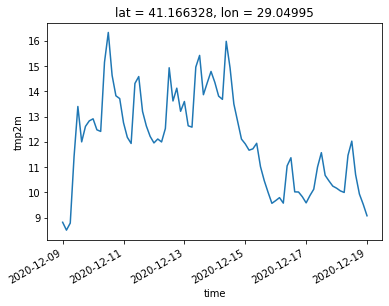

In [32]:
interpole_sarıyer.plot()

Bir de mesela tüm türkiye için celsius temp verimizin ilk zaman elemanını plot edelim 2 boyutlu olarak.

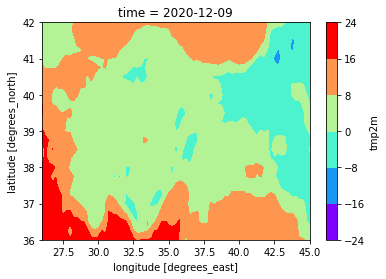

In [33]:
p = celsius_temp.isel(time = 0).plot.contourf(cmap='rainbow')